In [1]:
from os.path import dirname, join
import numpy as np
import matplotlib.pylab as plt
from scipy.io import loadmat

import blusky.datasets as datasets
from blusky.vis_tools.scat_display import *

In [7]:
from os.path import dirname, join
import numpy as np
import matplotlib.pylab as plt
from scipy.io import loadmat
from sdafile import SDAFile
import blusky.datasets as datasets

# Read in matlab files
test_data = join(dirname(datasets.__file__), join("vis_test_files", "scat_display.sda"))
sc_inputs = SDAFile(test_data,'r')
sc_digit_ = sc_inputs.extract('sc_digit')
sc = sc_inputs.extract('sc')
scat_d_ = sc_inputs.extract('scat_d')
scdirac_ = sc_inputs.extract('scdirac')

# Format data for input into scat_display
sc_digit = dict()
for i in range(0,len(sc_digit_)):
    sc_digit['m'+str(i)] = sc_digit_[i] 
del sc_digit_ 
sc_digit = nAttrDict(sc_digit)
scdirac = dict()
for i in range(0,len(scdirac_)):
    scdirac['m'+str(i)] = scdirac_[i] 
del scdirac_
scdirac = nAttrDict(scdirac)
scat_d = dict()
for i in range(0,len(scat_d_)):
    scat_d['m'+str(i)] = scat_d_[i] 
del scat_d_

# MST options
copts = {}
copts['renorm_process'] = 0 # no dirac normalization
copts['l2_renorm'] = 0  # changed from 1, 0 (divide by sqrt(2^scale))
copts['mirror'] = False
copts['plt_image'] = True
#copts['N'] = 512**2

image = scat_display(sc_digit,scdirac,copts,sc)


null is 0


/Users/thomoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.


(-0.5, 1024.5, 1024.5, -0.5)

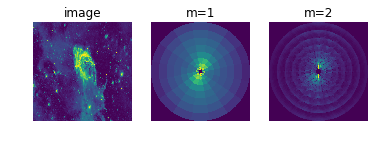

In [15]:
# Do the plotting

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.misc import imresize

test_image = join(dirname(datasets.__file__), join("matlab", "space.jpg"))
test_image = mpimg.imread(test_image)
test_image = test_image[:,:,0]
test_image = imresize(test_image, (512,512), interp='bicubic').astype('float32')

# Image
plt.subplot(1,3,1)
plt.imshow(test_image)
plt.title('image')
plt.axis('off')

# Scattering Coefficients
plt.subplot(1,3,2)
plt.imshow(image['1'])
plt.title('m=1')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(image['2'])
plt.title('m=2')
plt.axis('off')